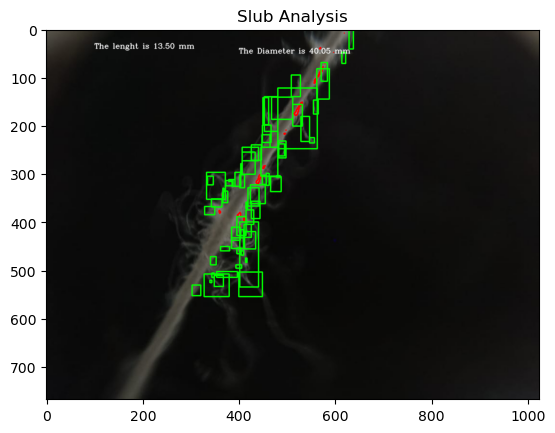

Maximum length: 135
40.0522159187229


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Test image 2.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Drawing the contours in the image
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)

# Applying canny edges to the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find the Hough lines in the edge image
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

max_length = 0
max_distance = 0

contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_distance = float('-inf')
min_distance = float('inf')

if lines is not None:
    # Get the first line (assumes only one line is present)
    rho, theta = lines[0][0]

    # Convert from polar to Cartesian coordinates
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Initially set the max length as 0
    

    # Calculate the distance between each contour point and the Hough line

    # Iterate through all the contours
    for contour in contours:
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)

        # Find the minimum enclosing circle for the contour
        (x,y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x),int(y))
        radius = int(radius)

        x, y, w, h = cv2.boundingRect(contour)

        length = max(w, h)

        if length > max_length:
            max_length = length

        # If the polygon has more than 4 sides, it is an irregular shape
        if len(approx) > 4:
            # Draw a bounding box around the irregular shape
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        # For diameter

        for point in contour:
                distance = np.abs((y2-y1)*point[0][0] - (x2-x1)*point[0][1] + x2*y1 - y2*x1) / np.sqrt((y2-y1)**2 + (x2-x1)**2)
                if distance > max_distance:
                    max_distance = distance
                    max_point = point[0]
                if distance < min_distance:
                    min_distance = distance
                    min_point = point[0]
else:
    pass
            
            
#cv2.putText(img, str(max_length), (100,40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)
max_length_mm = max_length * 0.1
diameter_mm = np.sqrt((max_point[0]-min_point[0])**2 + (max_point[1]-min_point[1])**2) * 0.1
cv2.putText(img, f'The lenght is {max_length_mm:.2f} mm'.format(str(max_length_mm)), (100,40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)
cv2.putText(img, f'The Diameter is {diameter_mm:.2f} mm'.format(str(diameter_mm)), (400,50), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Slub Analysis')
plt.show()
print('Maximum length:', max_length)

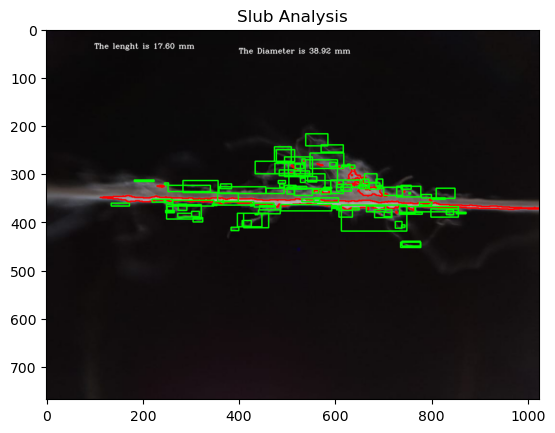

Maximum length: 176


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Real slub image.06.54 PM.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Drawing the contours in the image
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)

# Applying canny edges to the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find the Hough lines in the edge image
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

max_length = 0
max_distance = 0

contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_distance = float('-inf')
min_distance = float('inf')

if lines is not None:
    # Get the first line (assumes only one line is present)
    rho, theta = lines[0][0]

    # Convert from polar to Cartesian coordinates
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Initially set the max length as 0
    

    # Calculate the distance between each contour point and the Hough line

    # Iterate through all the contours
    for contour in contours:
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)

        # Find the minimum enclosing circle for the contour
        (x,y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x),int(y))
        radius = int(radius)

        x, y, w, h = cv2.boundingRect(contour)

        length = max(w, h)

        if length > max_length:
            max_length = length

        # If the polygon has more than 4 sides, it is an irregular shape
        if len(approx) > 4:
            # Draw a bounding box around the irregular shape
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        # For diameter

        for point in contour:
                distance = np.abs((y2-y1)*point[0][0] - (x2-x1)*point[0][1] + x2*y1 - y2*x1) / np.sqrt((y2-y1)**2 + (x2-x1)**2)
                if distance > max_distance:
                    max_distance = distance
                    max_point = point[0]
                if distance < min_distance:
                    min_distance = distance
                    min_point = point[0]
else:
    pass
            
            
#cv2.putText(img, str(max_length), (100,40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)
max_length_mm = max_length * 0.1
diameter_mm = np.sqrt((max_point[0]-min_point[0])**2 + (max_point[1]-min_point[1])**2) * 0.1
cv2.putText(img, f'The lenght is {max_length_mm:.2f} mm'.format(str(max_length_mm)), (100,40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)
cv2.putText(img, f'The Diameter is {diameter_mm:.2f} mm'.format(str(diameter_mm)), (400,50), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1, cv2.LINE_AA)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Slub Analysis')
plt.show()
print('Maximum length:', max_length)